In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

## Import the three datasets

In [2]:
ratings = pd.read_csv("F:\\SimpliLearn\\PYTHON\\NISHANT\\Project\\Movielens\\ratings.dat", sep="::", encoding="unicode_escape",header=None)
ratings.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
ratings.columns = ['UserID','MovieID','Rating','Timestamp']

In [4]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users = pd.read_csv("F:\\SimpliLearn\\PYTHON\\NISHANT\\Project\\Movielens\\users.dat", sep="::", encoding="unicode_escape",header=None)
users.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
users.columns = ['UserID','Gender','Age','Occupation','Zip-code']

In [7]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
movies = pd.read_csv("F:\\SimpliLearn\\PYTHON\\NISHANT\\Project\\Movielens\\movies.dat", sep="::", encoding="unicode_escape",header=None)
movies.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies.columns = ['MovieID','Title','Genres']

In [10]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [11]:
Combine = movies.merge(ratings,on='MovieID',how='inner')
Combine.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [12]:
Combine1=Combine.merge(users,on='UserID',how='inner')
Combine1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [13]:
Combine1.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [14]:
Master_Data = Combine1[['MovieID','Title','UserID','Age','Gender','Occupation','Rating']]
 
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,48,Pocahontas (1995),1,1,F,10,5
2,150,Apollo 13 (1995),1,1,F,10,5
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4
4,527,Schindler's List (1993),1,1,F,10,5


## Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

### User Age Distribution

In [15]:
Master_Data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

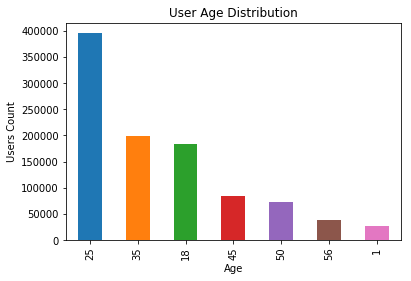

In [16]:
Master_Data['Age'].value_counts().plot(kind = 'bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

### User rating of the movie “Toy Story”

In [17]:
ToyStoryRating = Master_Data[Master_Data['Title'].str.contains('Toy Story') == True]
ToyStoryRating

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
50,3114,Toy Story 2 (1999),1,1,F,10,4
53,1,Toy Story (1995),6,50,F,9,4
124,1,Toy Story (1995),8,25,M,12,4
263,1,Toy Story (1995),9,25,M,17,5
346,3114,Toy Story 2 (1999),9,25,M,17,4
369,1,Toy Story (1995),10,35,F,1,5
715,3114,Toy Story 2 (1999),10,35,F,1,4
770,1,Toy Story (1995),18,18,F,3,4
1075,1,Toy Story (1995),19,1,M,10,5


In [18]:
ToyStoryRating.groupby(["Title","Rating"]).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

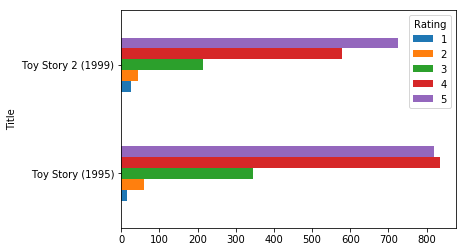

In [19]:
ToyStoryRating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

### Top 25 movies by viewership rating

In [20]:
Top25 = Master_Data.groupby('Title').size().sort_values(ascending=False)[:25]
Top25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

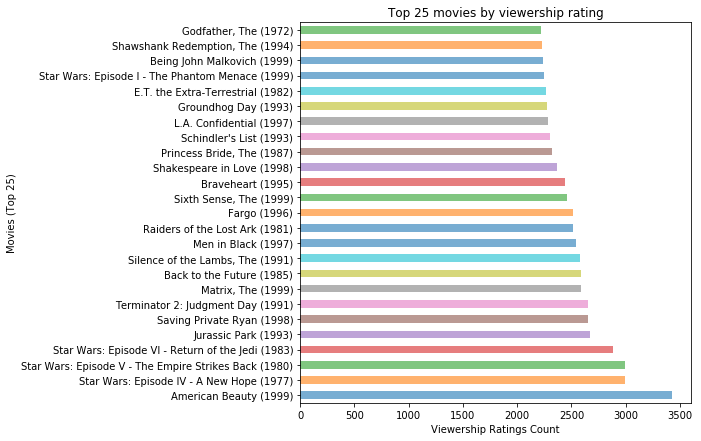

In [21]:
Top25.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()

### Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [22]:
userId = 2696
UserRatingById = Master_Data[Master_Data["UserID"] == userId]
UserRatingById

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
991035,350,"Client, The (1994)",2696,25,M,7,3
991036,800,Lone Star (1996),2696,25,M,7,5
991037,1092,Basic Instinct (1992),2696,25,M,7,4
991038,1097,E.T. the Extra-Terrestrial (1982),2696,25,M,7,3
991039,1258,"Shining, The (1980)",2696,25,M,7,4
991040,1270,Back to the Future (1985),2696,25,M,7,2
991041,1589,Cop Land (1997),2696,25,M,7,3
991042,1617,L.A. Confidential (1997),2696,25,M,7,4
991043,1625,"Game, The (1997)",2696,25,M,7,4
991044,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2


## Feature Engineering

### Use column genres:

#### Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [23]:
Genres = Combine1['Genres'].str.split("|")

In [24]:
Genres 

0                            [Animation, Children's, Comedy]
1                  [Animation, Children's, Musical, Romance]
2                                                    [Drama]
3                       [Action, Adventure, Fantasy, Sci-Fi]
4                                               [Drama, War]
5                                        [Children's, Drama]
6                   [Animation, Children's, Comedy, Musical]
7                           [Animation, Children's, Musical]
8                           [Animation, Children's, Musical]
9                                   [Crime, Drama, Thriller]
10                          [Animation, Children's, Musical]
11                                               [Animation]
12                             [Animation, Comedy, Thriller]
13                          [Animation, Children's, Musical]
14                                        [Musical, Romance]
15                   [Adventure, Children's, Drama, Musical]
16                      

In [25]:
list_Genres = set()
for genre in Genres:
    list_Genres = list_Genres.union(set(genre))

In [26]:
list_Genres 

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

#### Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [27]:
RatingsOneHot = Combine1['Genres'].str.get_dummies("|")

In [28]:
RatingsOneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [29]:
dfMaster = pd.concat([Combine1, RatingsOneHot],axis=1)
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


#### Determine the features affecting the ratings of any particular movie.

In [30]:
dfMaster[["title","Year"]] = dfMaster.Title.str.extract("(.)\s\((.\d+)",expand=True)

In [31]:
dfMaster = dfMaster.drop(columns=["title"])
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,1995
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,0,1,0,0,0,1977
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,1,0,1993


In [32]:
dfMaster['Year'] = dfMaster.Year.astype(int)

In [33]:
dfMaster['Movie_Age'] = 2000 - dfMaster.Year
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [34]:
dfMaster['Gender'] = dfMaster["Gender"].replace({"F":0, "M":1})

In [35]:
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,0,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,0,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,0,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,0,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,0,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [36]:
dfGenderAffecting = dfMaster.groupby('Gender').size().sort_values(ascending=False)[:25]

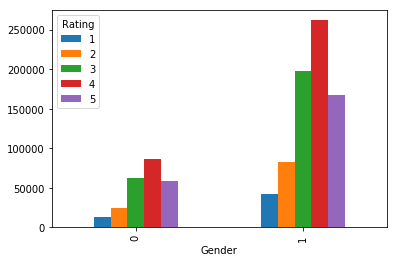

In [37]:
dfMaster.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

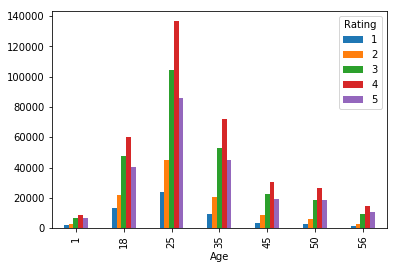

In [38]:
dfMaster.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

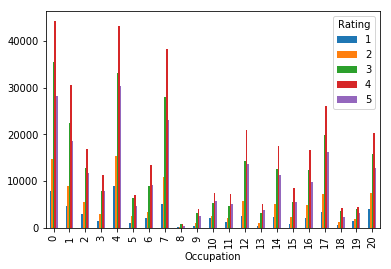

In [39]:
dfMaster.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

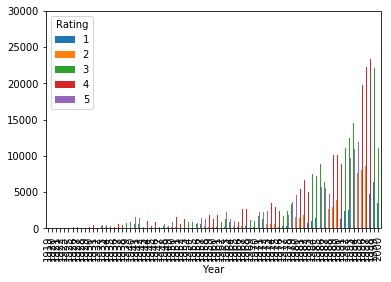

In [40]:
dfMaster.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

In [41]:
import matplotlib.pyplot as plt

<Figure size 360x720 with 0 Axes>

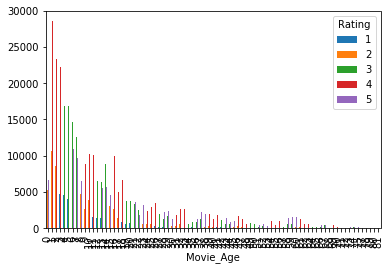

In [42]:
plt.figure(figsize=[5,10])
dfMaster.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

#### Develop an appropriate model to predict the movie ratings

In [43]:
# Use different Classification Models with Pipeline

In [44]:
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,0,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,0,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,0,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,0,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,0,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [45]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 30 columns):
MovieID        1000209 non-null int64
Title          1000209 non-null object
Genres         1000209 non-null object
UserID         1000209 non-null int64
Rating         1000209 non-null int64
Timestamp      1000209 non-null int64
Gender         1000209 non-null int64
Age            1000209 non-null int64
Occupation     1000209 non-null int64
Zip-code       1000209 non-null object
Action         1000209 non-null int64
Adventure      1000209 non-null int64
Animation      1000209 non-null int64
Children's     1000209 non-null int64
Comedy         1000209 non-null int64
Crime          1000209 non-null int64
Documentary    1000209 non-null int64
Drama          1000209 non-null int64
Fantasy        1000209 non-null int64
Film-Noir      1000209 non-null int64
Horror         1000209 non-null int64
Musical        1000209 non-null int64
Mystery        1000209 non-null int64
Romance   

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()
dfMaster[["Title","Genres","Zip-code"]] =dfMaster[["Title","Genres","Zip-code"]].apply(le.fit_transform)
print(dfMaster[["Title","Genres","Zip-code"]])

         Title  Genres  Zip-code
0         3411     145      1588
1         2598     153      1588
2          195     239      1588
3         3153      24      1588
4         2901     262      1588
5         2923     167      1588
6           89     146      1588
7         3055     152      1588
8          324     152      1588
9         1122     225      1588
10        1739     152      1588
11        3551     143      1588
12         713     155      1588
13        1611     152      1588
14        2289     282      1588
15        3656     113      1588
16        1331     281      1588
17         679     152      1588
18        2098     163      1588
19        1002     152      1588
20        3095     281      1588
21        1007     169      1588
22        2452     239      1588
23        2654      13      1588
24        3381     239      1588
25         870     239      1588
26         258     211      1588
27         346      19      1588
28        2619     239      1588
29        

In [48]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 30 columns):
MovieID        1000209 non-null int64
Title          1000209 non-null int64
Genres         1000209 non-null int64
UserID         1000209 non-null int64
Rating         1000209 non-null int64
Timestamp      1000209 non-null int64
Gender         1000209 non-null int64
Age            1000209 non-null int64
Occupation     1000209 non-null int64
Zip-code       1000209 non-null int64
Action         1000209 non-null int64
Adventure      1000209 non-null int64
Animation      1000209 non-null int64
Children's     1000209 non-null int64
Comedy         1000209 non-null int64
Crime          1000209 non-null int64
Documentary    1000209 non-null int64
Drama          1000209 non-null int64
Fantasy        1000209 non-null int64
Film-Noir      1000209 non-null int64
Horror         1000209 non-null int64
Musical        1000209 non-null int64
Mystery        1000209 non-null int64
Romance      

In [49]:
x=dfMaster.drop(["Rating","Genres"],axis=1)
y=dfMaster["Rating"]

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
models={"LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "SVM":SVC(),
        "Naive Bays":GaussianNB(),
        "KNN":KNeighborsClassifier(),
        "RandomForestClassifier":RandomForestClassifier(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        "XGBClassifier":XGBClassifier()}


In [62]:
def modelAccuracy(models,x,y,scaleFlag):
  #split data
  xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
  acc_result={}
  for name,model in models.items():
    #create pipeline
    if scaleFlag==0: 
      pipeline=Pipeline([("MinMaxScalar",MinMaxScaler()),
                       ("model",model)])
    elif scaleFlag==1:
      pipeline=Pipeline([("StandardScalar",StandardScaler()),
                       ("model",model)])
    elif scaleFlag==2:
      pipeline=Pipeline([("model",model)])

#Fitting model
    model_fit=pipeline.fit(xtrain,ytrain)
    ypred=model_fit.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    print("The accuracy for ",name, " is ",acc)
    acc_result[name]=acc

  return acc_result


In [63]:
def best_model(result):
  high=0
  for name,acc in result.items():
    if high<acc:
      high=acc
      model_name=name
  print('Best model is ',model_name," with accuracy : ",high)

In [ ]:
acc=modelAccuracy(models,x,y,2)